In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
from PIL import Image
import cv2
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# from torchvision import datasets, transforms

# # Define data transformations
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
# ])

# # Create a custom dataset
# train_dataset = datasets.ImageFolder('/content/gdrive/My Drive/Kagglecode_and_notebook/Train', transform=transform)

# # Create a DataLoader
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
train ='/content/gdrive/MyDrive/Mini Project/Kagglecode_and_notebook/Train'

In [ ]:
test='/content/gdrive/MyDrive/Mini Project/Kagglecode_and_notebook/Test'

In [ ]:
validation ='/content/gdrive/MyDrive/Mini Project/Kagglecode_and_notebook/Validation'

In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

In [ ]:
# Create a PyTorch dataset from the image files in the specified directory
traindataset = datasets.ImageFolder(root=train, transform=transform)
testdataset=datasets.ImageFolder(root=test, transform=transform)
validdataset=datasets.ImageFolder(root=validation, transform=transform)

In [ ]:
#minibatch gradient
batch_size=32
trainloader=torch.utils.data.DataLoader(traindataset, shuffle=True, batch_size=batch_size)
testloader=torch.utils.data.DataLoader(testdataset, shuffle=True, batch_size=batch_size)
validloader=torch.utils.data.DataLoader(validdataset, shuffle=True, batch_size=batch_size)

In [ ]:
# Get class labels
class_labels = traindataset.classes
class_labels

['Healthy', 'Powdery', 'Rust']

In [ ]:
# Print lengths of datasets
print(len(trainloader.dataset))
print(len(testloader.dataset))
print(len(validloader.dataset))

1322
154
60


In [ ]:
# Iterate through one batch of data
for image_batch, image_label in trainloader:
    # Access the first image and label in the batch
    first_image = image_batch[0]
    label_index = image_label[0].item()

    # Convert PyTorch tensor to NumPy array for printing
    first_image_numpy = first_image.permute(1, 2, 0).numpy()

    print(first_image_numpy)
    print(class_labels[label_index])

[[[0.41960785 0.5686275  0.4117647 ]
  [0.41960785 0.56078434 0.4117647 ]
  [0.41568628 0.5568628  0.40392157]
  ...
  [0.38039216 0.6039216  0.3882353 ]
  [0.39215687 0.6156863  0.4       ]
  [0.4        0.62352943 0.40784314]]

 [[0.42745098 0.5764706  0.43137255]
  [0.42352942 0.5686275  0.42352942]
  [0.41960785 0.56078434 0.4117647 ]
  ...
  [0.38039216 0.6039216  0.3882353 ]
  [0.39215687 0.6156863  0.4       ]
  [0.40392157 0.6313726  0.40784314]]

 [[0.4392157  0.58431375 0.4509804 ]
  [0.43137255 0.5803922  0.4392157 ]
  [0.42745098 0.5686275  0.42352942]
  ...
  [0.38431373 0.60784316 0.39215687]
  [0.39215687 0.61960787 0.4       ]
  [0.40392157 0.6313726  0.40784314]]

 ...

 [[0.27450982 0.34901962 0.31764707]
  [0.28627452 0.35686275 0.32941177]
  [0.32941177 0.39607844 0.37254903]
  ...
  [0.65882355 0.7019608  0.3372549 ]
  [0.67058825 0.7137255  0.34901962]
  [0.6666667  0.70980394 0.3529412 ]]

 [[0.34509805 0.41960785 0.39607844]
  [0.3019608  0.37254903 0.34509805]


In [ ]:
batch_size = 32  # Adjust the batch size to your actual batch size
total_train_samples = len(trainloader) * batch_size
total_test_samples = len(testloader) * batch_size
total_valid_samples = len(validloader) * batch_size

print("Total train samples:", total_train_samples)
print("Total test samples:", total_test_samples)
print("Total valid samples:", total_valid_samples)


Total train samples: 1344
Total test samples: 160
Total valid samples: 64


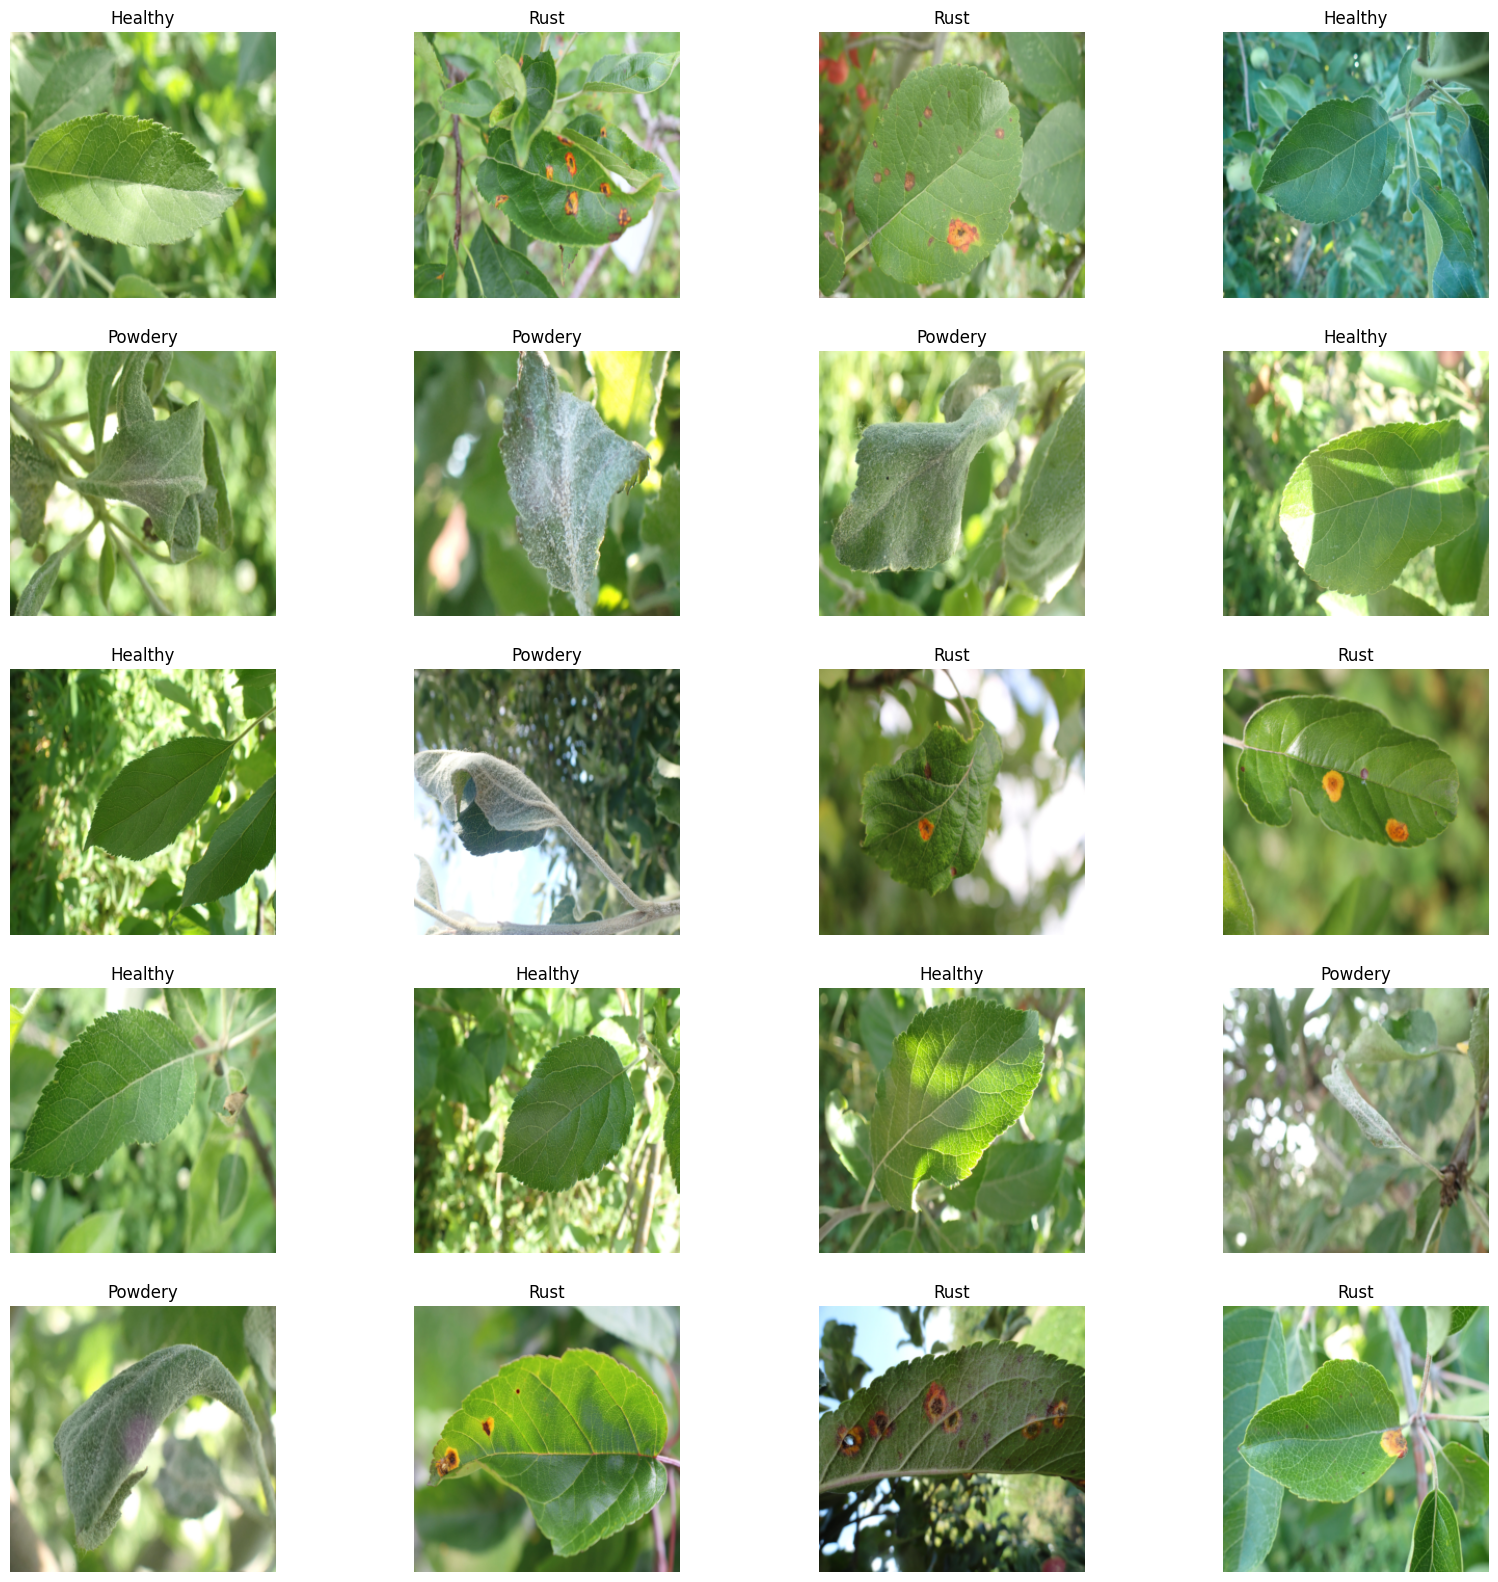

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have valid_loader as your DataLoader
for image_batch, image_label in trainloader:
    # Convert PyTorch tensors to numpy arrays
    image_batch_np = image_batch.numpy()
    image_label_np = image_label.numpy()

    # Plot the images
    plt.figure(figsize=(20, 20))
    for i in range(20):  # Assuming you want to plot 20 images
        plt.subplot(5, 4, i + 1)

        # Transpose the tensor from (C, H, W) to (H, W, C)
        img_np = np.transpose(image_batch_np[i], (1, 2, 0))

        # Ensure pixel values are in the correct range [0, 1]
        img_np = np.clip(img_np, 0, 1)

        plt.imshow(img_np)
        plt.title(class_labels[image_label_np[i]])
        plt.axis("off")

    plt.show()
    break  # Break the loop after the first batch for illustration

In [ ]:
import torch
from torchvision import transforms

# Define the PyTorch transformations
resizing_and_rescaling = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL Image
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # This automatically scales pixel values to [0, 1]
])

# Example of how to apply the transformation to an image tensor
sample_image_tensor = torch.rand((3, 300, 300))  # Example image tensor with shape (C, H, W)
transformed_image = resizing_and_rescaling(sample_image_tensor)

print("Original shape:", sample_image_tensor.shape)
print("Transformed shape:", transformed_image.shape)


Original shape: torch.Size([3, 300, 300])
Transformed shape: torch.Size([3, 256, 256])


In [ ]:
import torch
from torchvision import transforms

# Define the PyTorch data augmentation transformations
data_augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0, contrast=0.3, saturation=0, hue=0),
])

# Example of how to apply the transformation to an image tensor
sample_image_tensor = torch.rand((3, 256, 256))  # Example image tensor with shape (C, H, W)
transformed_image = data_augmentation(sample_image_tensor)

print("Original shape:", sample_image_tensor.shape)
print("Transformed shape:", transformed_image.shape)


Original shape: torch.Size([3, 256, 256])
Transformed shape: torch.Size([3, 256, 256])


In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import models
from PIL import Image
# import albumentations as A
# from albumentations.pytorch.transforms import ToTensorV2
import numpy as np
import os
import random
from easydict import EasyDict  # Using EasyDict instead of addict
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import logging

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()

        self.resizing_and_rescaling = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
        ])

        self.data_augmentation = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(degrees=20),
            transforms.ColorJitter(brightness=0, contrast=0.3, saturation=0, hue=0),
        ])

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(64 * 15 * 15, 500)
        self.dropout1 = nn.Dropout(0.4)

        self.fc2 = nn.Linear(500, 500)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(500, 100)
        self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(100, 3)

    def forward(self, x):
        x = self.resizing_and_rescaling(x)
        x = self.data_augmentation(x)

        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = F.relu(self.conv4(x))
        x = self.pool4(x)

        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout2(x)

        x = F.relu(self.fc3(x))
        x = self.dropout3(x)

        x = self.fc4(x)

        return F.softmax(x, dim=1)

# Instantiate the model
model = CustomModel()

# Save the model
torch.save(model.state_dict(), 'custom_model.pt')


In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset

class PlantDiseaseDataset(Dataset):
    def __init__(self, path, augmentations=None, image_shape=(256, 256), channels="RGB"):
        self.__images_labels = []
        self.image_shape = image_shape
        self.channels = channels
        self.augmentations = augmentations

        if os.path.exists(path):
            self.labels = os.listdir(path)
            for label in self.labels:
                label_path = os.path.join(path, label)
                if os.path.isdir(label_path):
                    files = os.listdir(label_path)
                    for file in files:
                        if file.endswith("jpg") or file.endswith("png"):
                            image_path = os.path.join(label_path, file)
                            self.__images_labels.append((image_path, label))
                        else:
                            pass
                else:
                    pass
        else:
            pass

    def _load(self, path, channels="RGB"):
        width, height = self.image_shape
        loader = transforms.Compose([
            transforms.Resize((width, height)),
            transforms.ToTensor(),
        ])

        image = Image.open(path).convert(channels)
        return loader(image)

    def __len__(self):
        return len(self.__images_labels)

    def __getitem__(self, index):
        path, label = self.__images_labels[index]
        image = self._load(path)

        if self.augmentations is not None:
            image = self.augmentations(image)

        label = self.labels.index(label)

        return {
            "image": image,
            "label": label,
        }

def collate_fn(batch):
    all_images, all_labels = [], []
    for item in batch:
        image = item["image"]
        label = item["label"]

        all_images.append(image)
        all_labels.append(label)

    return {
        "images": torch.stack(all_images),
        "labels": torch.tensor(all_labels, dtype=torch.int8)
    }


In [ ]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms, datasets

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        # Define your model architecture here
        # Example: Simple Convolutional Neural Network
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 3)  # Output layer with 3 neurons for 3 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the transform for normalization
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Specify the path to your dataset (replace 'path/to/dataset' with your actual path)
train_path = '/content/gdrive/MyDrive/Mini Project/Kagglecode_and_notebook/Train'
validation_path = '/content/gdrive/MyDrive/Mini Project/Kagglecode_and_notebook/Validation'

# Use ImageFolder to automatically load data from the directory structure
# Create a PyTorch dataset from the image files in the specified directory
traindataset = datasets.ImageFolder(root=train_path, transform=transform)
validdataset = datasets.ImageFolder(root=validation_path, transform=transform)

# Set up data loaders
batch_size = 32
train_loader = DataLoader(traindataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(validdataset, batch_size=batch_size, shuffle=False)

# Instantiate the PyTorch model
pytorch_model = CustomModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    pytorch_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation loop
    pytorch_model.eval()
    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = pytorch_model(inputs)
            val_loss = criterion(outputs, labels)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

# Save the trained model
torch.save(pytorch_model.state_dict(), '/content/gdrive/MyDrive/Model/pytorch_model.pt')


Epoch 1/3, Loss: 1.072680115699768, Validation Loss: 0.7761107683181763
Epoch 2/3, Loss: 0.6366578340530396, Validation Loss: 0.8176460266113281
Epoch 3/3, Loss: 0.18797814846038818, Validation Loss: 0.6618145108222961


In [ ]:
testdataset=datasets.ImageFolder(root=test, transform=transform)
batch_size = 32
test_loader = DataLoader(testdataset, batch_size=batch_size, shuffle=True)
# Instantiate the PyTorch model
pytorch_model = CustomModel()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)

In [ ]:
# Set the model to evaluation mode
pytorch_model.eval()

# Evaluate on the training data
total_train_loss = 0.0
correct_train = 0
total_train_samples = 0

with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels)
        total_train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train_samples += labels.size(0)

# Calculate average loss and accuracy on the training data
average_train_loss = total_train_loss / len(train_loader)
accuracy_train = correct_train / total_train_samples

print("Loss on Train data:", average_train_loss)
print("Accuracy on Train data:", accuracy_train)

# Evaluate on the test data
total_test_loss = 0.0
correct_test = 0
total_test_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels)
        total_test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct_test += (predicted == labels).sum().item()
        total_test_samples += labels.size(0)

# Calculate average loss and accuracy on the test data
average_test_loss = total_test_loss / len(test_loader)
accuracy_test = correct_test / total_test_samples

print("Loss on Test data:", average_test_loss)
print("Accuracy on Test data:", accuracy_test)

Loss on Train data: 1.0985001439139956
Accuracy on Train data: 0.3472012102874433
Loss on Test data: 1.1003324508666992
Accuracy on Test data: 0.3181818181818182


In [ ]:
# Set the model to training mode
pytorch_model.train()

# Lists to store training and validation accuracy, loss
train_accuracy_list = []
train_loss_list = []
val_accuracy_list = []
val_loss_list = []

for epoch in range(num_epochs):
    # Training loop
    pytorch_model.train()
    total_correct_train = 0
    total_samples_train = 0
    total_loss_train = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss_train += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_correct_train += (predicted == labels).sum().item()
        total_samples_train += labels.size(0)

    average_loss_train = total_loss_train / len(train_loader)
    accuracy_train = total_correct_train / total_samples_train

    train_loss_list.append(average_loss_train)
    train_accuracy_list.append(accuracy_train)

    # Validation loop
    pytorch_model.eval()
    total_correct_val = 0
    total_samples_val = 0
    total_loss_val = 0.0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = pytorch_model(inputs)
            loss = criterion(outputs, labels)
            total_loss_val += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_correct_val += (predicted == labels).sum().item()
            total_samples_val += labels.size(0)

    average_loss_val = total_loss_val / len(valid_loader)
    accuracy_val = total_correct_val / total_samples_val

    val_loss_list.append(average_loss_val)
    val_accuracy_list.append(accuracy_val)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss_train}, Accuracy: {accuracy_train}, Validation Loss: {average_loss_val}, Validation Accuracy: {accuracy_val}')


Epoch 1/3, Loss: 2.443720452132679, Accuracy: 0.5885022692889561, Validation Loss: 0.7203240394592285, Validation Accuracy: 0.65
Epoch 2/3, Loss: 0.3822770945373036, Accuracy: 0.8600605143721634, Validation Loss: 0.5972610712051392, Validation Accuracy: 0.7666666666666667
Epoch 3/3, Loss: 0.2853275878088815, Accuracy: 0.905446293494705, Validation Loss: 0.7337309718132019, Validation Accuracy: 0.85


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have lists for training and validation accuracy and loss (e.g., train_accuracy_list, train_loss_list, val_accuracy_list, val_loss_list).

EPOCHS = 3  # Make sure this matches the actual number of epochs

plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), train_accuracy_list, label="Training Accuracy")
plt.plot(range(1, EPOCHS + 1), val_accuracy_list, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), train_loss_list, label="Training Loss")
plt.plot(range(1, EPOCHS + 1), val_loss_list, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()


In [ ]:
import torch
from torchvision import transforms
from PIL import Image

def Prediction(model, img):
    # Assuming img is a PyTorch tensor with shape (C, H, W) where C is the number of channels

    # Ensure the number of channels is 3 (RGB)
    if img.shape[0] != 3:
        raise ValueError(f"Input image should have 3 channels (RGB). Got {img.shape[0]} channels.")

    # Convert the PyTorch tensor to a PIL image
    to_pil = transforms.ToPILImage()
    pil_img = to_pil(img)  # No need to permute for 3 channels

    # Transform the PIL image as needed (resize, normalization, etc.)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    img_array = transform(pil_img)
    img_array = torch.unsqueeze(img_array, 0)  # create a batch

    # Perform prediction
    model.eval()
    with torch.no_grad():
        predictions = model(img_array)

    # Get predicted class and confidence
    predicted_class = class_labels[torch.argmax(predictions[0]).item()]
    confidence = round(100 * torch.max(predictions[0]).item(), 2)

    return predicted_class, confidence

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Assuming you have the class_labels and test dataset

# ... (Previous code remains unchanged)

plt.figure(figsize=(20, 25))
for images, labels in test_loader:  # Assuming test_loader is the DataLoader for your test dataset
    for i in range(min(20, len(images))):
        ax = plt.subplot(5, 4, i + 1)

        # Convert the PyTorch tensor to a NumPy array
        img_array = images[i].detach().cpu().numpy()

        # Ensure the image has only 3 channels (RGB)
        if img_array.shape[0] == 1:  # If it has a single channel, duplicate it to form an RGB image
            img_array = np.repeat(img_array, 3, axis=0)
        elif img_array.shape[0] == 4:  # If it has 4 channels (RGBA), discard the alpha channel
            img_array = img_array[:3, :, :]

        # Normalize the image
        img_array = (img_array - img_array.min()) / (img_array.max() - img_array.min())

        # Display the normalized image in RGB format
        plt.imshow(img_array.transpose(1, 2, 0))

        # Get predictions
        predicted_class, confidence = Prediction(pytorch_model, images[i])

        # Display the actual and predicted labels with confidence
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")

plt.show()

In [ ]:
!pip install scikit-learn lime matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=704a6add2d47cb5fd911d7e7b3506328e89b1501fcf51c716cd2f4f2e3d5e285
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install shap scikit-learn

In [ ]:
import shap
import os
import cv2
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lime
from lime import lime_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image

In [ ]:
!pip install torch torchvision

In [ ]:
# Function to preprocess the image for prediction
img_path='/content/gdrive/My Drive/Kagglecode_and_notebook/Train'
def preprocess_image(img_path):
    img = Image.open(img_path)

    # Convert to grayscale and resize
    img_gray = img.convert('L').resize((256, 256))

    # Convert grayscale to RGB
    img_rgb = Image.merge('RGB', (img_gray, img_gray, img_gray))

    # Normalize and convert to float
    img_array = np.array(img_rgb, dtype=np.float32) / 255.0

    # Add batch dimension
    img_array = np.expand_dims(np.expand_dims(img_array, axis=0), axis=-1)

    return img_array


In [ ]:
# Define a function for PyTorch model prediction
# def predict_fn(images):
#     outputs = pytorch_model(images)
#     _, predicted = torch.max(outputs, 1)
#     return predicted


def predict_fn(images):
    # Convert the images to a PyTorch tensor if they are not already
    if not isinstance(images, torch.Tensor):
        images = torch.tensor(images, dtype=torch.float32)

    # Move the tensor to the appropriate device (e.g., GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    images = images.to(device)

    # Make predictions using the PyTorch model
    outputs = pytorch_model(images)

    # Get the predicted class for each image
    _, predicted = torch.max(outputs, 1)

    # Convert the predicted tensor to a numpy array
    return predicted.cpu().numpy()




In [ ]:
# Create a LIME explainer
explainer = lime_image.LimeImageExplainer()

In [ ]:
import os

# Assuming you have three folders: 'Healthy', 'Powdery', and 'Rust' within the 'Test' folder
base_path = '/content/gdrive/My Drive/Kagglecode_and_notebook/Test'

# Iterate over the test set
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            # Construct the path to each image
            image_path = os.path.join(class_path, image_name)

            # Preprocess the image using the preprocess_image function
            test_image = preprocess_image(image_path)


In [ ]:
import os

# Assuming you have three folders: 'Healthy', 'Powdery', and 'Rust' within the 'Test' folder
base_path = '/content/gdrive/My Drive/Kagglecode_and_notebook/Test'

# Iterate over the test set
for class_folder in os.listdir(base_path):
    class_path = os.path.join(base_path, class_folder)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            # Construct the path to each image
            image_path = os.path.join(class_path, image_name)

            # Preprocess the image using the preprocess_image function
            test_image = preprocess_image(image_path)

            # Generate explanations for the image
            explanation = explainer.explain_instance(test_image, predict_fn, top_labels=3, hide_color=0, num_samples=1000)

            # Display or save the explanations as needed
            # You can customize this part based on your requirements
            plt.imshow(test_image)
            plt.title(f'Original Image - Class: {class_folder}')
            plt.show()

            # Display the LIME explanation for the top class
            temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
            boundaries = mark_boundaries(temp / 2 + 0.5, mask)
            plt.imshow(boundaries)
            plt.title(f'LIME Explanation for Top Class - Class: {class_folder}')
            plt.show()
